In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 

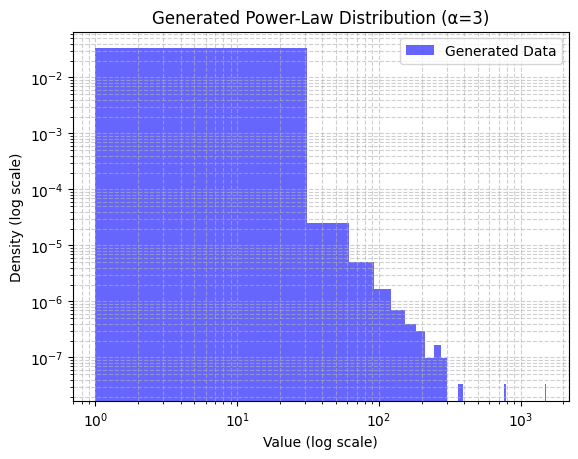

In [24]:
import numpy as np

def power_law_random(alpha, xmin, size=1000):
    """ Generate random numbers following a power-law distribution. """
    u = np.random.uniform(0, 1, size)
    return xmin * (u ** (-1 / (alpha - 1)))

# Parameters
alpha = 3  # Power-law exponent
xmin = 1.0   # Minimum value

# Generate power-law-distributed numbers
samples = power_law_random(alpha, xmin, size=1_000_000)

# Plot histogram in log-log scale
import matplotlib.pyplot as plt

plt.hist(samples, bins=50, density=True, alpha=0.6, color='b', label="Generated Data")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Value (log scale)")
plt.ylabel("Density (log scale)")
plt.title(f"Generated Power-Law Distribution (α={alpha})")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)

plt.show()

/tmp/ipykernel_432443/1252868647.py:4: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(size), np.log(freq))


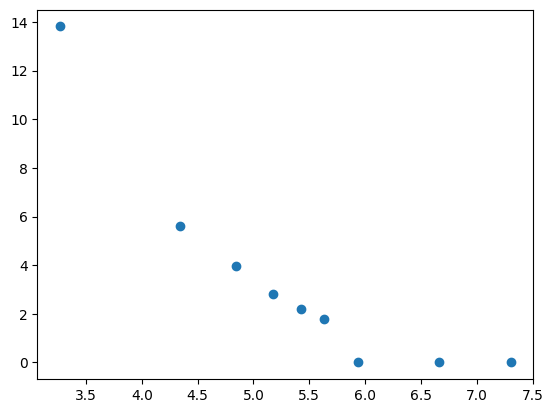

In [25]:
freq , size = np.histogram(samples, bins = 30)
size = (size[1:] + size[:-1])/2

plt.scatter(np.log(size), np.log(freq))

slope is -1.9905131554399507


/tmp/ipykernel_432443/378158447.py:4: RuntimeWarning: divide by zero encountered in log
  plt.scatter(size, np.log(freq))


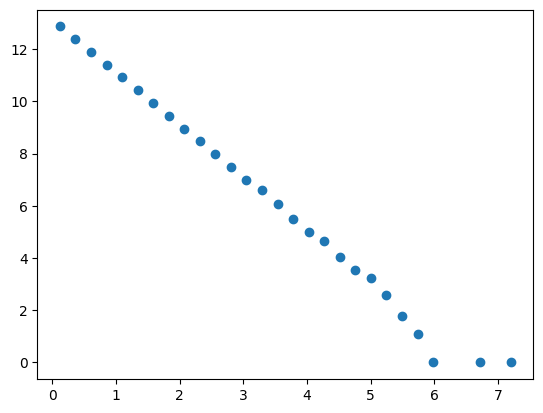

In [26]:
freq , size = np.histogram(np.log(samples), bins = 30)
size = (size[1:] + size[:-1])/2

plt.scatter(size, np.log(freq))

print(f"slope is {stats.linregress(size[freq>0], np.log(freq[freq>0]))[0]}")

slope is -3.0017184789752687


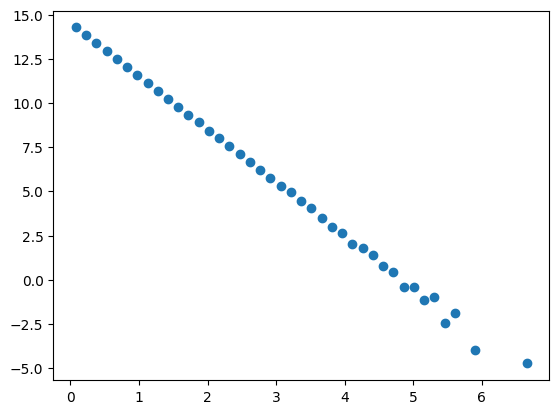

In [27]:
bins = np.logspace(np.log10(samples[samples > 0].min()),np.log10((samples.max())),50)

freq , size = np.histogram(samples[samples > 0], bins = bins)
bins_size = (size - np.roll(size,1))[1:]
freq = freq / bins_size




size = (size[1:] + size[:-1])/2



plt.scatter(np.log(size[freq>0]), np.log(freq[freq>0]))


print(f"slope is {stats.linregress(np.log(size[freq>0]), np.log(freq[freq>0]))[0]}")

-1.0143985088004956